<a href="https://colab.research.google.com/github/realmistic/PythonInvest-basic-fin-analysis/blob/master/PythonInvest_com_2_2_EveryDay_Sentiment_Analysis_of_Financial_News_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#%pip install newsapi-python
#%pip install yfinance
#%pip install nltk
#%pip install matplotlib
#%pip install numpy
#%pip install pandas

In [2]:
import nltk
### Uncomment it when the script runs for the first time
nltk.download('vader_lexicon')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [3]:
#%pip uninstall newsapi-python
%pip install newsapi-python

In [4]:
from newsapi import NewsApiClient
#from newsapi.newsapi_client import NewsApiClient
from datetime import date, timedelta, datetime

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [6]:
# Show full output in Colab
# https://stackoverflow.com/questions/54692405/output-truncation-in-google-colab
pd.set_option('display.max_colwidth',100)

In [7]:
NEWS_API_KEY = '8dd7188808d942d7b6df04700ef5147f'


# 3) The News API example

In [12]:
#https://newsapi.org/docs/endpoints/everything

newsapi = NewsApiClient(api_key= NEWS_API_KEY)
keywrd = 'Tesla stock'
my_date = date.today() - timedelta(days=1)
# datetime.strptime('10-Apr-2021','%d-%b-%Y')

articles = newsapi.get_everything(q = keywrd,
                                      from_param = my_date.isoformat(),
                                      to = (my_date + timedelta(days = 1)).isoformat(),
                                      language="en",
                                      #sources = ",".join(sources_list),
                                      sort_by="relevancy",
                                      page_size = 10)

In [13]:
articles

{'status': 'ok',
 'totalResults': 82,
 'articles': [{'source': {'id': None, 'name': 'Quartz India'},
   'author': 'Laura Bratton',
   'title': "Tesla's Facebook and Instagram ads might just be Elon Musk's cry for help",
   'description': "Tesla bought ads on Meta's social media sites for the first time ever as the automaker struggles",
   'url': 'https://qz.com/elon-musk-tesla-advertising-facebook-meta-1851366547',
   'urlToImage': 'https://i.kinja-img.com/image/upload/c_fill,h_675,pg_1,q_80,w_1200/e5aa7c631b6b6977582fa42738ab7b8e.jpg',
   'publishedAt': '2024-03-26T17:34:00Z',
   'content': 'For a long stretch, Tesla was too good for\xa0Facebook and Instagram ads until now.\r\nTesla hasnt had a Facebook page in six years, having deleted it as news of the companys Cambridge Analytica data scan… [+2472 chars]'},
  {'source': {'id': None, 'name': 'Quartz India'},
   'author': 'William Gavin',
   'title': 'Elon Musk is pushing Full Self-Driving trials on every Tesla buyer in North America

In [14]:
PHRASES = ['Tesla (TSLA) vehicle insurance registrations in China are down compared to last quarter and the same time period in 2023 as Q1 vehicle deliveries appear likely to be well below Wall Street consensus.',\
           'Musk In Hot Water: Can Tesla’s Simplicity Save Automakers?',\
           'Corporations use government grants to lighten debt load']

for phrase in PHRASES:
  print(f'{phrase}')
  print(sia.polarity_scores(phrase))

Tesla (TSLA) vehicle insurance registrations in China are down compared to last quarter and the same time period in 2023 as Q1 vehicle deliveries appear likely to be well below Wall Street consensus.
{'neg': 0.0, 'neu': 0.938, 'pos': 0.062, 'compound': 0.2732}
Musk In Hot Water: Can Tesla’s Simplicity Save Automakers?
{'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'compound': 0.4939}
Corporations use government grants to lighten debt load
{'neg': 0.24, 'neu': 0.577, 'pos': 0.183, 'compound': -0.1531}


In [15]:

def get_articles_sentiments(keywrd, startd, sources_list = None, show_all_articles = False):

  newsapi = NewsApiClient(api_key= NEWS_API_KEY)
  if type(startd) == str:
    my_date = datetime.strptime(startd,'%d-%b-%Y')
  else:
    my_date = startd
  # business_en_sources = get_sources('business','en')
  if sources_list:
    articles = newsapi.get_everything(q = keywrd,
                                      from_param = my_date.isoformat(),
                                      to = (my_date + timedelta(days = 1)).isoformat(),
                                      language="en",
                                      sources = ",".join(sources_list),
                                      sort_by="relevancy",
                                      page_size = 100)
  else:
     articles = newsapi.get_everything(q = keywrd,
                                       from_param = my_date.isoformat(),
                                       to = (my_date + timedelta(days = 1)).isoformat(),
                                       language="en",
                                       sort_by="relevancy",
                                       page_size = 100)
  article_content = ''

  date_sentiments = {}
  date_sentiments_list = []
  seen = set()

  for article in articles['articles']:
    if str(article['title']) in seen:
      continue
    else:
      seen.add(str(article['title']))
      article_content = str(article['title']) + '. ' + str(article['description'])
      sentiment = sia.polarity_scores(article_content)['compound']
      date_sentiments.setdefault(my_date, []).append(sentiment)
      date_sentiments_list.append((sentiment, article['url'],article['title'],article['description']))

  date_sentiments_l = sorted(date_sentiments_list, key=lambda tup: tup[0], reverse = True)
  sent_list = list(date_sentiments.values())[0]

  return pd.DataFrame(date_sentiments_list, columns=['Sentiment','URL','Title','Description'])

In [ ]:
# return_articles = get_articles_sentiments(keywrd= 'Tesla stock' ,startd = '9-Apr-2021',sources_list = None, show_all_articles= True)
# return_articles.Sentiment.hist(bins=30,grid=False)
# print(return_articles.Sentiment.mean())
# print(return_articles.Sentiment.count())
# print(return_articles.Description)


    Sentiment  \
0     -0.4404   
1      0.0000   
2      0.2960   
3      0.1280   
4      0.4927   
..        ...   
70     0.7269   
71    -0.6597   
72     0.8074   
73     0.2960   
74     0.9201   

                                                                                                    URL  \
0                                   https://qz.com/elon-musk-tesla-advertising-facebook-meta-1851366547   
1                            https://qz.com/elon-musk-tesla-full-self-driving-fsd-free-trial-1851365845   
2                                                                 https://biztoc.com/x/0e098d080dedcc30   
3                      https://qz.com/stock-of-novo-nordisk-rival-jumps-more-than-25-on-weig-1851366280   
4   https://www.forbes.com/sites/johnnavin/2024/03/25/the-tesla-price-chart-on-5-different-time-frames/   
..                                                                                                  ...   
70  https://economictimes.indiatimes.com/marke

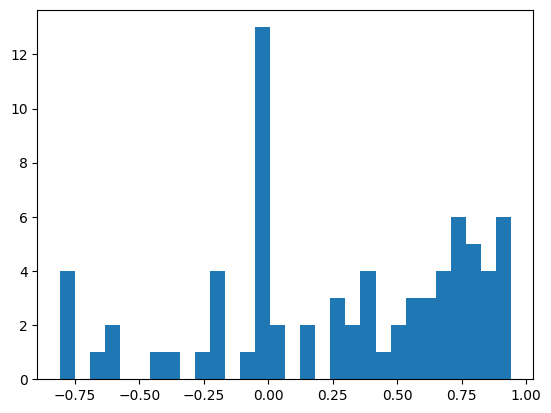

In [16]:

my_date = date.today() - timedelta(days=1)

return_articles = get_articles_sentiments(keywrd= 'Tesla stock' ,startd = my_date, sources_list = None, show_all_articles= True)
return_articles.Sentiment.hist(bins=30, grid=False)
print(return_articles)
# print(return_articles.Sentiment.mean())
# print(return_articles.Sentiment.count())
# print(return_articles.Description)


In [17]:
return_articles["Date"] = my_date

In [18]:
return_articles.head()

,Sentiment,URL,Title,Description,Date
0,-0.4404,https://qz.com/elon-musk-tesla-advertising-facebook-meta-1851366547,Tesla's Facebook and Instagram ads might just be Elon Musk's cry for help,Tesla bought ads on Meta's social media sites for the first time ever as the automaker struggles,2024-03-26
1,0.0000,https://qz.com/elon-musk-tesla-full-self-driving-fsd-free-trial-1851365845,Elon Musk is pushing Full Self-Driving trials on every Tesla buyer in North America,Tesla CEO Elon Musk is requiring employees to install and show customers how to use his company’...,2024-03-26
2,0.2960,https://biztoc.com/x/0e098d080dedcc30,TSLA Stock Alert: Tesla Heats Up Amid Rumored Talks With Italian Government,TSLA stock is up alongside the rumors Tesla (NASDAQ:TSLA) stock is on the move Tuesday as rumors...,2024-03-26
3,0.1280,https://qz.com/stock-of-novo-nordisk-rival-jumps-more-than-25-on-weig-1851366280,Midday movers: Novo Nordisk rival's stock jumps more than 25% on weight loss pill data,"After experiencing a Monday blues, the stock market was back in action on Tuesday, with former P...",2024-03-26
4,0.4927,https://www.forbes.com/sites/johnnavin/2024/03/25/the-tesla-price-chart-on-5-different-time-frames/,The Tesla Price Chart On 5 Different Time Frames.,"Still the most actively traded stock most days, Tesla is no longer among the favorites of the Na...",2024-03-26


In [22]:
return_articles.sort_values(by='Sentiment', ascending=True)[['Sentiment','URL', 'Description','Title']].head(2)

,Sentiment,URL,Description,Title
47,-0.8074,https://biztoc.com/x/715bb590b0916334,Cash-strapped Fisker's talks with a large automaker for a potential deal have collapsed and the ...,"Fisker deal talks with big automaker collapse, NYSE to delist stock"
62,-0.7717,https://www.marketscreener.com/quote/stock/TESLA-INC-6344549/news/Fundamentals-vie-with-FOMO-as-...,"(marketscreener.com) Fundamentals or\n""FOMO?""\n Big Tech's resilience, concentration, and unassa...",Fundamentals vie with 'FOMO' as US tech boom driver: McGeever


In [23]:
return_articles.sort_values(by='Sentiment', ascending=False)[['Sentiment','URL', 'Description','Title']].head(2)

,Sentiment,URL,Description,Title
5,0.9403,https://biztoc.com/x/d5052701f307d550,Tesla stock was leading the Magnificent Seven group of megacap technology companies higher. Shar...,Tesla Leads a Magnificent Seven March
74,0.9201,https://slashdot.org/firehose.pl?op=view&amp;id=173389455,Tesla stock leaps as Elon Musk pushes key technology tied to profit boostTheStreet Elon Musk req...,Tesla stock leaps as Elon Musk pushes key technology tied to profit boost - TheStreet


In [24]:
return_articles.to_csv("TSLA_news_sentiments_"+my_date.isoformat()+".csv")